In [2]:
import os
import pickle
from glob import glob
import numpy as np
import torch
import pandas as pd
from fsl.data.image import Image
from fsl.utils.image.resample import resampleToPixdims
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
path = 'T2_FLAIR_brain_to_MNI.pkl'
data = pd.read_pickle(path)
data.head()

,min,max,mean,med,std,1p,25p,75p,99p,norm99p
21708942,-93.0,1057.0,109.414246,0.0,190.796341,0.0,0.0,164.0,573.0,5.236978
23425368,-82.0,1062.0,109.369164,0.0,193.363785,0.0,0.0,137.0,599.0,5.476864
22943860,-90.0,1433.0,136.663269,0.0,236.791077,0.0,0.0,240.0,714.0,5.224520
24837551,-113.0,1456.0,137.367645,0.0,239.545029,0.0,0.0,203.0,714.0,5.197731
25243303,-78.0,993.0,98.101418,0.0,171.156952,0.0,0.0,147.0,518.0,5.280250


In [4]:
def get_array(df,col):
    return df.loc[:][col].values

def stats_calc(df,col):
    arr = get_array(df,col)
    return np.min(arr), np.max(arr), np.mean(arr), np.median(arr), np.std(arr)

def plot_hist(df, col, title=None):
    array = get_array(df, col)
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ax.grid(axis='y', alpha = 0.75, b=True, which='major', linestyle='-')
    ax.hist(array, bins=50, color='blue', alpha=0.7, rwidth=0.85)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
#     plt.title(title)
    fig.patch.set_facecolor('xkcd:white')
    _,_,mean,_,std = stats_calc(df, col)
    if col == 'min':
        thr = mean - 2 * std
    elif col=='max':
        thr = mean + 2 * std
    if col == 'min' or col =='max':
        ax.axvline(x=thr, color='r', linestyle='dashed', linewidth=2)
    else:
        ax.axvline(x=mean, color='r', linestyle='dashed', linewidth=2)
    plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, facecolor='none', bbox_inches="tight")

def plot_bars(df, labels_list, title=None):
    array_list = get_array(df,labels_list)
#     fig = plt.figure(figsize=(8,6))
    fig, ax = plt.subplots(figsize=(8,6))
#     ax.set_title(title)
    ax.grid(axis='y', alpha = 0.75)
    ax.boxplot(array_list)
    ax.set_xticklabels(labels_list)
    # ax.set_xticklabels(['0', '1', '2','3','4','5', '25', '50', '75','95', '96', '97','98','99', '100'])
    plt.xlabel('Percentile')
    plt.ylabel('Values')
    plt.grid(axis='y', alpha = 0.75)
    fig.patch.set_facecolor('xkcd:white')
    # plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, facecolor='none', bbox_inches="tight")
    plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+' UKBB'+'.png')

In [5]:
print('Stats (min, max, mean, med, std) for MIN: ', stats_calc(data, 'min'))
print('Stats (min, max, mean, med, std) for MAX: ', stats_calc(data, 'max'))
print('Stats (min, max, mean, med, std) for NORM99p: ', stats_calc(data, 'norm99p'))

Stats (min, max, mean, med, std) for MIN:  (-274.0, -16.0, -99.49435576329482, -98.0, 22.576994677429585)
Stats (min, max, mean, med, std) for MAX:  (176.0, 2820.0, 1270.8929358849987, 1258.0, 215.9345293490112)
Stats (min, max, mean, med, std) for NORM99p:  (4.743080139160156, 8.582718849182129, 5.238670777324034, 5.230380535125732, 0.14324657013507852)


In [6]:
_,_,mean,_,std = stats_calc(data, 'min')
print(mean-2*std)
_,_,mean,_,std = stats_calc(data, 'max')
print(mean+2*std)

-144.648345118154
1702.761994583021


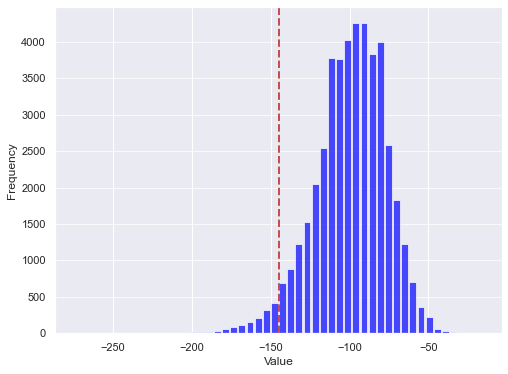

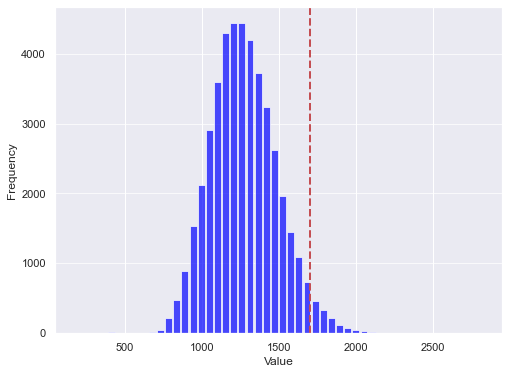

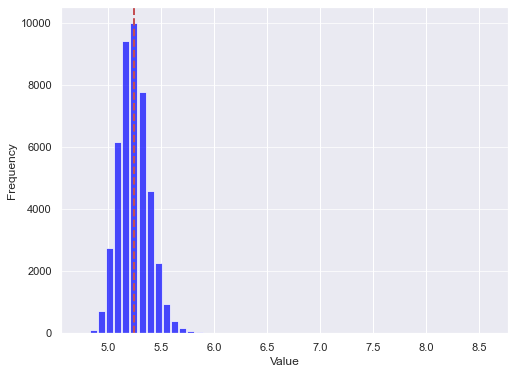

In [8]:
plot_hist(data, 'min', title='T2_Min_Value_Distribution')
plot_hist(data, 'max', title='T2_Value_Distribution')
plot_hist(data, 'norm99p', title='T2_norm99p_Value_Distribution')

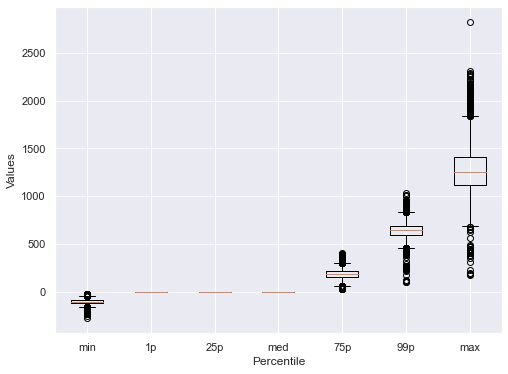

In [9]:
plot_bars(data, ['min', '1p', '25p', 'med', '75p','99p', 'max'], 'T2_Voxel_Intensity_Value_Distribution')

In [10]:
data['min_corrected'] = data['min'] / data['mean']
data['max_corrected'] = data['max'] / data['mean']

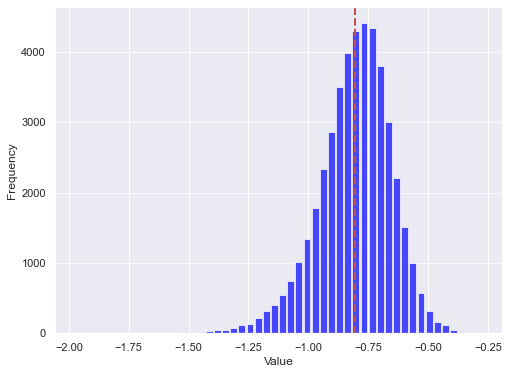

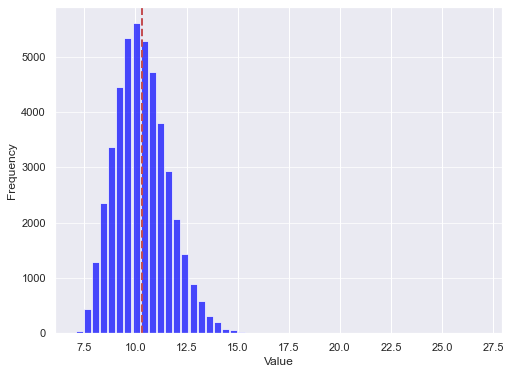

In [11]:
plot_hist(data, 'min_corrected', title='misc')
plot_hist(data, 'max_corrected', title='misc')

In [12]:
data['min_norm'] = data['min_corrected'] / np.mean(data['norm99p'])
data['max_norm'] = data['max_corrected'] / np.mean(data['norm99p'])

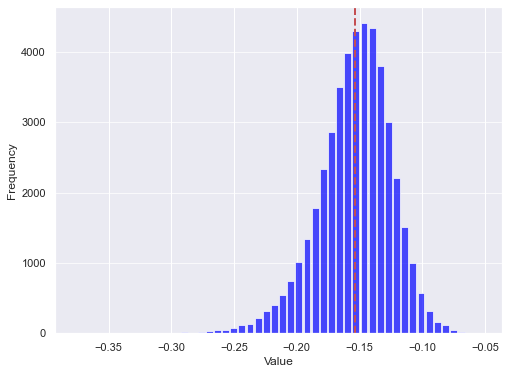

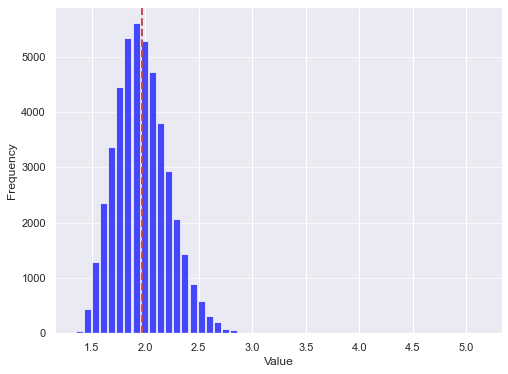

In [13]:
plot_hist(data, 'min_norm', title='misc')
plot_hist(data, 'max_norm', title='misc')

In [14]:
min_scale = data['min'].mean() - data['min'].std()*2
max_scale = data['max'].mean() + data['max'].std()*2
data_scale = max(abs(min_scale), abs(max_scale))
print(data_scale)

data['min_scaled'] = data['min'] / data_scale
data['max_scaled'] = data['max'] / data_scale

1702.766755542984


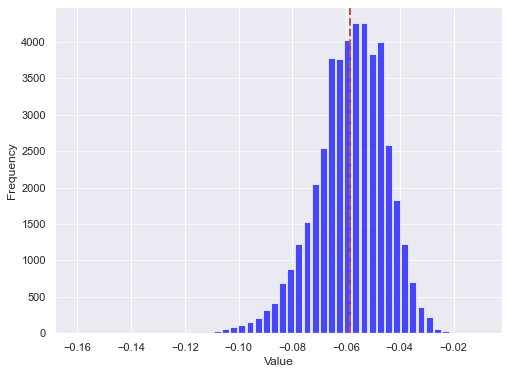

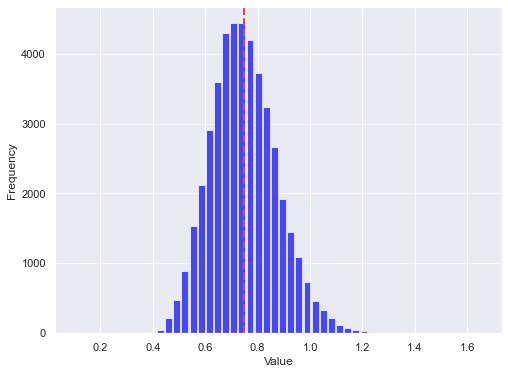

In [15]:
plot_hist(data, 'min_scaled', title='misc')
plot_hist(data, 'max_scaled', title='misc')